# NLP

## 1. Carga de datos

Los datos se encuentran en formato JSON.

In [1]:
# Cargamos las librerías

import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

nltk.download('punkt')
nltk.download('stopwords') # Cargamos las palabras que vamos a utilizar para hacer stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Cargamos el Dataset
dataset = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines= True)
dataset.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


¿Cuántas instancias tiene el dataset?¿Cuáles son sus columnas?¿Cuántos titulares hay de cada tipo?

In [3]:
dataset.shape

(28619, 3)

* El Dataset tiene 28619 instancias.
* Sus columnas son 3.
* Hay 2 titulares de cada tipo (sarcasmo o no).

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


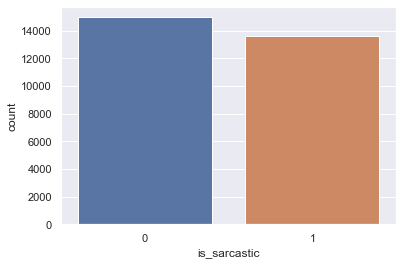

In [4]:
sns.countplot(dataset.is_sarcastic)
plt.show()

* Hay más información correspondiente a titulares no sarcásticos.
* El 0 corresponde a No sarcástico y el 1 a sarcástico.

## 2. Breve exploración del dataset

Se elige una instancia del dataset al azar y se selecciona el *headline*.

In [5]:
index_random = np.random.randint(0,high = dataset.shape[0])
titular = dataset.iloc[index_random].headline
print(index_random, titular)

28079 fox host links immigration reform to upcoming ferguson grand jury decision


Comprobar si es sarcástico o no imprimiendo en la celda de abajo el valor correspondiente del dataset. Si es 0 no será sarcástico, si es 1 será sarcástico.

In [6]:
print(index_random, dataset.iloc[index_random].is_sarcastic)

28079 0


## 3. NLTK

Si es difícil para algunos humanos detectar el sarcasmo, probablemente también lo sea para una computadora. De todas formas, se puede hacer el intento. Para ello, es necesario extraer características de cada texto que sirvan para ir apuntando al objetivo.  

### Tokenización

¿Qué es y para qué sirve?¿Cuáles de todas las formas de tokenización presentadas serían más útiles para este problema?

* Tokenizar, significa separar cada unidad semántica, para poder analizarla por separado.
* La mayoría de las veces, la unidad semántica es exactamente lo mismo que la unidad léxica (que es una manera elegante de decir `palabra`); entonces tokenizar se parece mucho a `separar un texto en palabras`.
* La tokenización puede realizarse:
    * Por `Palabra` (word_tokenize);
    * Por `Setencia` o por oración (sent_tokenize).

Se elige un titular y se prueban distintas herramientas:

1. `sent_tokenize`

In [7]:
titular_st = nltk.tokenize.sent_tokenize(titular)
titular_st

['fox host links immigration reform to upcoming ferguson grand jury decision']

* Como el titular es una sola oración, la tokenización no generó cambios en éste caso.

2. `word_tokenize`

In [8]:
titular_wt = nltk.tokenize.word_tokenize(titular)
titular_wt

['fox',
 'host',
 'links',
 'immigration',
 'reform',
 'to',
 'upcoming',
 'ferguson',
 'grand',
 'jury',
 'decision']

* El resultado, es una lista, donde cada una de las palabras de la oración, van a aparecer como un elemento independiente de la lista.

### Normalización

¿Qué es y para qué sirve? Notar que varias formas de normalización ya vienen aplicadas en el dataset.

* En lenguaje natural, no todas las partes transmiten la misma cantidad de información, algunas son más informativas que otras, es decir, tienen mayor  **carga semántica.**

* La __Normalización__ del texto, es el proceso de transformar el texto en una única forma canónica que podría no haber tenido antes. La normalización del texto antes de almacenarlo o procesarlo permite la separación de preocupaciones, ya que se garantiza que la entrada sea coherente antes de realizar operaciones en él

#### Stopwords

* Son palabras que No nos proporcionan información: a, ante, cabe, con, contra... etc.

* En NLP, muchas veces vamos a querer deshacernos de los tokens de menor carga semántica para trabajar solamente con aquellos de mayor carga. Nos referimos a los tokens descartados como "stop words". Para no tener que hacer el trabajo de identificar y filtrar a mano cada una de las stop words, nltk nos ofrece un catálogo predefinido de  *stop words*  que podemos modificar a gusto según lo necesitemos.

Se importan los `stopwords` del inglés y se imprimen.

In [9]:
# Cargamos el 'corpus', el universo de palabras disponibles. Del mismo, sólo seleccionamos las stopwords, para el idioma inglés
stopwords = nltk.corpus.stopwords.words('english')

# Stopwords que no se encuentran en la lista de palabras anterior
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Se elimina del titular elegido los stopwords.

In [10]:
titular_wt_sin_sw = [word for word in titular_wt if word not in stopwords]
titular_wt_sin_sw

['fox',
 'host',
 'links',
 'immigration',
 'reform',
 'upcoming',
 'ferguson',
 'grand',
 'jury',
 'decision']

¿Cuál o cuáles palabras se fueron?

* With, to y and (puede cambiar de acuerdo a la oración elegida).

### Frecuencia de palabras

Dado el titular ya tokenizado por palabras y sin stopwords, se utiliza `nltk` para extrar la frecuencia con que aparece cada palabras.

In [11]:
freq = nltk.FreqDist(titular_wt_sin_sw)
freq

FreqDist({'fox': 1, 'host': 1, 'links': 1, 'immigration': 1, 'reform': 1, 'upcoming': 1, 'ferguson': 1, 'grand': 1, 'jury': 1, 'decision': 1})

* En éste caso, todas las palabras, se repiten 1 sola vez.

### Dataset Completo

Antes de pasar a extraer features de cada instancia del Dataset, podemos hacer un pequeño análisis del dataset en su conjunto. Por ejemplo, una opción es agrupar todos los titulares por tipo y extraer de cada clase las palabras más frecuentes. Para ello:

1. Agrupar los titulares por tipo. Crear un dataframe para cada uno.
2. Crear una lista vacia y agregar en esa lista todos los titulares (por tipo/dataframe creado) ya tokenizados (usar el `RegexpTokenizer`) y filtrado por `stopwords`.
3. Usar el `FreqDist` (distribución de frecuencia) en esa lista que acaban de llenar. Llevar lo que devuelve `FreqDist` a un Dataframe. Ordenar por frecuencia en que aparece cada palabra.
4. Hacer un `barplot` o similar para visualizar.
5. ¿Qué palabras filtrarían, aparte de las que aparecen en `stopwords`? Crear una lista vacía y agregarlas a mano. Agregar en el código que realizaron una línea (similar a la que usan con `stopwords`) para que también filtre por esas palabras.
6. Volver a visualizar.

#### No-Sarcasmo

In [12]:
# La lista 'filtrar', va a contener la palabra 'u' y 'new'
filtrar = []
if True:
    filtrar.append("u") # Textos anteriores
    filtrar.append("new") # Textos nuevos

In [13]:
# Para todo el Dataset, vamos a filtrar por aquellos que sean Sarcásticos
dataset_no_sarcasmo = dataset[dataset.is_sarcastic==0]
display(dataset_no_sarcasmo.head())
print(dataset_no_sarcasmo.shape)

,is_sarcastic,headline,article_link
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


(14985, 3)


In [14]:
# Para todas las filas (titulares) hacemos lo siguiente:
    # Obtenemos el headline del titular
    # Tokenizamos el titular, pero antes quitamos las expresiones Regulares (que sean letras que van de la A a la Z)
    # Eliminamos las stopwords
    # Las que no están en la lista de filtrado (las que están son u y new)
    # Se agregan todos los titulares no_sarcasmo, luego de todo el preproceso

todos_titulares_no_sarcasmo = []
for i in range(dataset_no_sarcasmo.shape[0]):
    titular = dataset_no_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]

    todos_titulares_no_sarcasmo.append(titular)

In [15]:
# print (todos_titulares_no_sarcasmo)
# Es una lista con listas, como palabras tiene cada una de las frases en el Dataset

In [16]:
todos_titulares_no_sarcasmo = list(itertools.chain(*todos_titulares_no_sarcasmo))
todos_titulares_no_sarcasmo[0:10] # Primeras 10 palabras, correspondientes al primer elemento de no sarcasmo

['dem',
 'rep',
 'totally',
 'nails',
 'congress',
 'falling',
 'short',
 'gender',
 'racial',
 'equality']

In [17]:
# Cantidad veces aparece cada palabra
freq_no_sarcasmo = nltk.FreqDist(todos_titulares_no_sarcasmo)
freq_no_sarcasmo

FreqDist({'trump': 1446, 'donald': 458, 'not': 387, 'says': 349, 'women': 317, 'one': 268, 'year': 244, 'first': 242, 'man': 241, 'people': 241, ...})

In [18]:
# Armamos un Dataset, con la frecuencia con la que aparece cada palabra
df_no_sarcasmo = pd.DataFrame(list(freq_no_sarcasmo.items()), columns = ["Word","Frequency"])
df_no_sarcasmo.head()

,Word,Frequency
0,dem,4
1,rep,23
2,totally,23
3,nails,10
4,congress,71


In [19]:
# Lo ordenamos de mayor a menor
df_no_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_no_sarcasmo.head()

,Word,Frequency
61,trump,1446
225,donald,458
222,not,387
561,says,349
896,women,317


In [20]:
# Eliminamos los índices, y luego los regeneramos pero en Órden y desde 0
df_no_sarcasmo.reset_index(drop = True, inplace=True)
df_no_sarcasmo.head()

,Word,Frequency
0,trump,1446
1,donald,458
2,not,387
3,says,349
4,women,317


* De ésta manera, ahora podemos graficar las palabras por su óden de frecuencia.

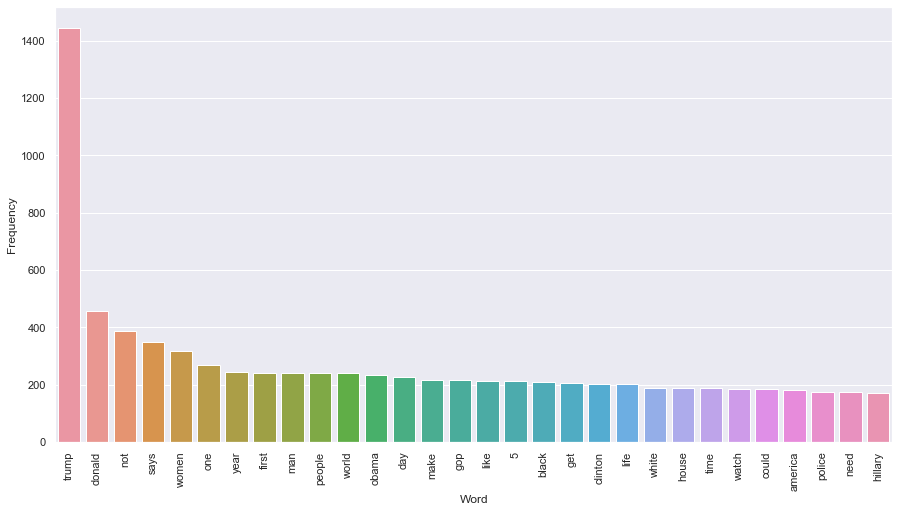

In [21]:
# Graficamos las primeras 30 palabras
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasmo.iloc[:30].Word, y = df_no_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Sarcasmo

In [22]:
dataset_sarcasmo = dataset[dataset.is_sarcastic==1]
dataset_sarcasmo.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...


In [23]:
todos_titulares_sarcasmo = []
for i in range(dataset_sarcasmo.shape[0]):
    titular = dataset_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
    todos_titulares_sarcasmo.append(titular)

In [24]:
todos_titulares_sarcasmo = list(itertools.chain(*todos_titulares_sarcasmo))
todos_titulares_sarcasmo[0:10]

['thirtysomething',
 'scientists',
 'unveil',
 'doomsday',
 'clock',
 'hair',
 'loss',
 'inclement',
 'weather',
 'prevents']

In [25]:
freq_sarcasmo = nltk.FreqDist(todos_titulares_sarcasmo)
freq_sarcasmo

FreqDist({'man': 1284, 'report': 516, 'area': 490, 'not': 425, 'nation': 389, 'woman': 387, 'trump': 386, 'year': 343, 'one': 319, 'time': 309, ...})

In [26]:
df_sarcasmo = pd.DataFrame(list(freq_sarcasmo.items()), columns = ["Word","Frequency"])
df_sarcasmo.head()

,Word,Frequency
0,thirtysomething,1
1,scientists,85
2,unveil,9
3,doomsday,3
4,clock,15


In [27]:
df_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_sarcasmo.head()

,Word,Frequency
54,man,1284
116,report,516
46,area,490
69,not,425
249,nation,389


In [28]:
df_sarcasmo.reset_index(drop = True, inplace=True)
df_sarcasmo.head()

,Word,Frequency
0,man,1284
1,report,516
2,area,490
3,not,425
4,nation,389


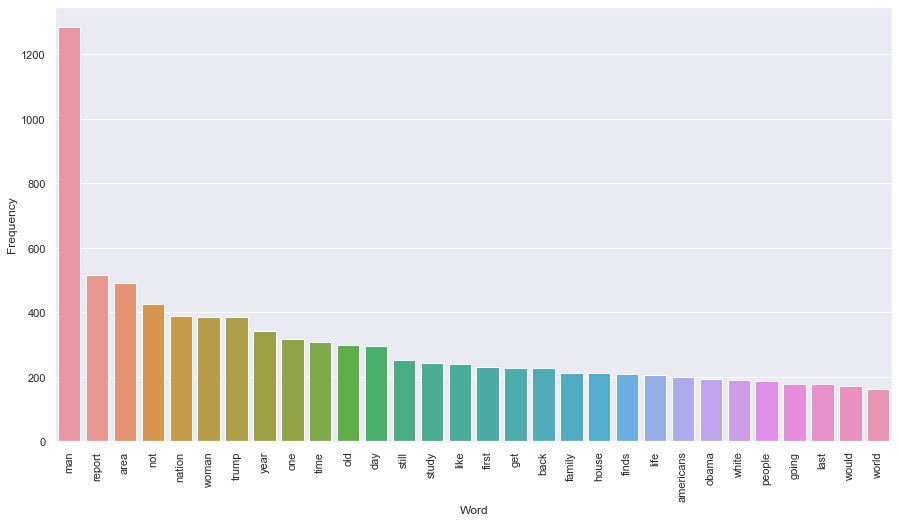

In [29]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_sarcasmo.iloc[:30].Word, y = df_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## 4. Stemming
Por razones gramaticales muchas palabras pueden escribirse de manera distinta (debido a conjugación, género, número) pero tener el mismo significado para el texto. Por ejemplo si decimos "jugar", "jugando" o "juega", debido a como estan conjugadas, la computadora puede tratarlas como palabras distintas. Pero, en términos de significado, todas estan relacionadas al verbo Jugar. Muchas veces nos va a convenir unir todas estos términos en uno solo.

Una de las manera de hacer esto es por "STEMMING". El Stemming es un proceso eurístico que recorta la terminación de las palabras, agrupándolas por su raiz (no se convierte necesariamente en una palabra real). Reduzcamos la cantidad de palabras diferentes en nuestro dataset utilizando este proceso.

* Ventaja: Es un proceso bastante rápido a la hora de encontrar la raíz de las palabras.
* Desventaja: tiene muchos errores en la determinación de las nuevas palabras.

a. Se importa nuevamente el dataset completo

In [30]:
dataset = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines= True)
dataset.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


b. Se toma del `dataset` solo las columnas de interes

In [31]:
# Concatenamos los headlines que corresponden a sarcasmo y no sarcasmo para que formen parte del mismo dataframe
# Luego, eliminamos la columna que no nos sirve que es el link del artículo
# Reordenamos
dataset=pd.concat([dataset.headline,dataset.is_sarcastic],axis=1)
dataset.dropna(axis=0,inplace=True)  # Si hay alguna nan, tiramos esa instancia
dataset.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


c. Antes de realizar el proceso de Stemming, se normaliza el texto. Se agrega en este caso el uso de la libreria `re`, que permite sacar del texto todos los caracteres que no sean palabras. Notar que hay veces que no conviene quitar estos caracteres ya que, por ejemplo, no se podrá distiguir preguntas (?) o exclamaciones (!).

In [32]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer() # Forma eurística (va aprendiendo a partir de lo ocurrido) para hacer stemización

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopword.remove('no')
#stopword.remove('not')

In [33]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada una de las palabras
# Vamos a hacer una lista donde van a estar todos los titulares, luego de haber sido preprocesados
titular_list=[]
for titular in dataset.headline: # Ya es un Dataframe, por eso headline
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras del titular
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a Stemmizar cada una de esas palabras
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular, separando con un espacio a cada una de ellas
    titular=" ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    titular_list.append(titular)
    #dataset["titular_normalizado"] = titular_list

d. Se agrega al Dataset una columna llamado `titular_stem` que contenga los titulares stemmizados

In [34]:
dataset["titular_stem"] = titular_list
dataset.tail()

,headline,is_sarcastic,titular_stem
28614,jews to celebrate rosh hashasha or something,1,jew celebr rosh hashasha someth
28615,internal affairs investigator disappointed con...,1,intern affair investig disappoint conspiraci
28616,the most beautiful acceptance speech this week...,0,beauti accept speech week came queer korean
28617,mars probe destroyed by orbiting spielberg-gat...,1,mar probe destroy orbit spielberg gate space p...
28618,dad clarifies this not a food stop,1,clarifi food stop


e. Se arma un nuevo dataset llamado `dataset_stem` que contenga solo las columnas `titular_stem` e `is_sarcastic`

In [35]:
# Quitamos los titulares vacíos
# Hacemos una concatenación de todos los titulares stemizados
dataset_stem=pd.concat([dataset.titular_stem,dataset.is_sarcastic],axis=1)
dataset_stem.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_stem.head()

,titular_stem,is_sarcastic
0,thirtysometh scientist unveil doomsday clock h...,1
1,total nail congress fall short gender racial e...,0
2,veggi delici differ recip,0
3,inclement weather prevent liar get work,1
4,mother come pretti close use word stream corre...,1


## 5. Lemmatization

Otra manera de llevar distintas palabras a un raíz común en la que comparten un significado es mediante el procezo de 'Lemmatizar' el texto. Es similar al 'Stemming' pero un poco más educado, ya que intenta realizar el proceso teniendo en cuenta cuál es el rol que la palabra cumple en el texto. Esto quiere decir que su accionar será distinto si la palabra a lemmantizar está actuando como verbo, sustantivo, etc. 

Para usar las funciones que ofrece `nltk` para lemmantizar, tendremos primero que descargar la libreria `Wordnet` que se encuentra en la solapa 'corpora' y las librerias 'maxent_treebank_pos_' y 'averaged_perceptron_tagger' que se encuentra en la solapa 'Models'. Para eso ejecute la siguiente celda:

In [36]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ale\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ale\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

Vemos cómo actúa el lemmatizer sobre una frase de ejemplo.

In [38]:
# Oracion que usaremos como ejemplo
frase = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

# Hay que regularizar el texto. Dejar solo letra, pasar a minúsculas y tokenizar:

# Sacamos todos los caracteres que no sean letras (los puntos, por ej., van a desaparecer)
frase = re.sub("[^a-zA-Z]"," ",str(frase))
# Pasamos a minúsculas
frase = frase.lower()
# Tokenizamos
frase_tokens = nltk.word_tokenize(frase)

# Veamos como cambians las palabras al lemmatizar
print("{0:20}{1:20}".format("Word","Lemma"))
for palabra in frase_tokens:
    print ("{0:20}{1:20}".format(palabra,wordnet_lemmatizer.lemmatize(palabra)))

Word                Lemma               
he                  he                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
he                  he                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
sun                 sun                 


No cambiaron casi nada (solo se fueron las "s" del final). El problema es que es necesario darle información extra al Lemmatizer, decirle qué rol está cumpliendo la palabra en la oración. Ésto se hace pasandole un argumento extra a la función llamado POS (Part Of Speech).

Hay distintos metodos que intentan averiguar el rol que cumple una palabra en una oración. En éste caso se utilizará uno que viene incorporado en NLTK llamado pos_tag.

In [39]:
# Se aplica una etiqueta, donde expone a qué tipo de palabra es cada una
print(nltk.pos_tag(frase_tokens))

[('he', 'PRP'), ('was', 'VBD'), ('running', 'VBG'), ('and', 'CC'), ('eating', 'VBG'), ('at', 'IN'), ('same', 'JJ'), ('time', 'NN'), ('he', 'PRP'), ('has', 'VBZ'), ('bad', 'JJ'), ('habit', 'NN'), ('of', 'IN'), ('swimming', 'NN'), ('after', 'IN'), ('playing', 'VBG'), ('long', 'JJ'), ('hours', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('sun', 'NN')]


Las etiquetas refieren al tipo de palabra. Se define una función para traducir estas etiquetas a los valores de POS que entiende `wordnet_lemmatizer`.

In [40]:
from nltk.corpus import wordnet

# Transformamos las palabras lematizadas, a través de una f(x), que nos permita determinar qué es c/u de ellas en cada posición
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Ahota, nuestro ejemplo para UNA SOLA FRASE.

In [41]:
# Se toma cada palabra y se almacena en w
# Se pasan por la función get_wordnet_pos, que nos dice qué tipo de palabra es, en c/u de las posiciones
# Volvemos a llamar al lematizador, pero también le pasamos la palabra, sino qué tipo es
# Luego volvemos a tokenizar
frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(frase)]
tipo_palabra = [get_wordnet_pos(w) for w in nltk.word_tokenize(frase)]

# Veamos como cambiaron las palabras
print("{0:20}{1:20}{2:20}".format("Palabra:","Tipo:","Lemma:"))
for i in range(len(frase_tokens)):
    print ("{0:20}{1:20}{2:20}".format(frase_tokens[i],tipo_palabra[i],frase_lemma[i]))

Palabra:            Tipo:               Lemma:              
he                  n                   he                  
was                 v                   be                  
running             v                   run                 
and                 n                   and                 
eating              v                   eat                 
at                  n                   at                  
same                a                   same                
time                n                   time                
he                  n                   he                  
has                 v                   have                
bad                 a                   bad                 
habit               n                   habit               
of                  n                   of                  
swimming            v                   swim                
after               n                   after               
playing             v   

a. Ahora toca aplicar todo esto a nuestro Dataset. Se vuelve a importar y se realiza un procedimiento análogo al ya hecho para la parte de Stemming.

In [42]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplzar caracteres
import re

dataset = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines= True)
dataset = pd.concat([dataset.headline,dataset.is_sarcastic],axis=1)
dataset.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopword.remove('no')
#stopword.remove('not')

In [43]:
titular_list=[]
for titular in dataset.headline:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    
    # Eliminamos las palabras d emenos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [44]:
# Construimos un Dataframe
dataset["titular_lemm"] = titular_list # incluímos la versión del titular, pero Lematizado
dataset.tail()

,headline,is_sarcastic,titular_lemm
28614,jews to celebrate rosh hashasha or something,1,jews celebrate rosh hashasha something
28615,internal affairs investigator disappointed con...,1,internal affairs investigator disappointed con...
28616,the most beautiful acceptance speech this week...,0,beautiful acceptance speech week came queer ko...
28617,mars probe destroyed by orbiting spielberg-gat...,1,mars probe destroyed orbiting spielberg gates ...
28618,dad clarifies this not a food stop,1,clarifies food stop


b. Por último se arma un nuevo datasate llamado `dataset_lem` que tenga solo las columnas `titular_lemm` y `is_sarcastic`.

In [45]:
dataset_lemm = pd.concat([dataset.titular_lemm,dataset.is_sarcastic],axis=1)
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_lemm.head()

,titular_lemm,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,totally nails congress falling short gender ra...,0
2,veggies deliciously different recipes,0
3,inclement weather prevents liar getting work,1
4,mother comes pretty close using word streaming...,1


## 6. Vectorizar

Ahora, se construye el modelo con bolsa de palabras.

Hasta ahora, tenemos un grupo de palabras por cada titular (bag of words), ya sea *lemmatizado* o *stemmizado*.  
La idea ahora es representar esta lista de palabras como un vector. Para esto se utilizará la función `CountVectorizer` de Scikit-Learn, la cual permite representar cada título por un vector con un `1` en las palabras que contiene y un `0` en las que no.  
Además, se trabajará únicamente con las palabras que aparecen más veces en el texto, ya que las que aparecen una única vez o pocas veces no nos van a brindar información que se pueda generalizar.

a. Lista de palabras y el vector que nos dice si es o no sarcástico el título

In [46]:
# Tomamos la lista de palabras y el vector que nos dice si es o no sarcastico el titulo
list_titulos = list(dataset_lemm['titular_lemm'].values) # Lista
is_sarc = dataset_lemm['is_sarcastic'].values # Serie

## Para probar con Stemmizer:
#list_titulos = list(dataset_stem'titular_stem'].values)
#is_sarc = dataset_stem['is_sarcastic'].values

In [47]:
print (len(list_titulos))

28619


b. Conversor de bag of words a vectores que traemos de sklearn. `CountVectorizer` posee varias funcionalidades que pueden determinarse a partir de parámetros.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# Es un vector que tiene en cada posición, cuántas veces aparece cada palabra (bolsa de palabras)
# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia, de la clase vectorizador, tendrá 1000 features (con conteo más alto)
cou_vec=CountVectorizer(max_features=max_features) # Predet: stop_words="english" ; ngram_range=(1, 2) -cuántas veces aparecen combinaciones de 2 palabras consecutivas-

Desde `CountVectorizer` se pueden quitar las stopwords (algo que ya hicimos con `nltk`) e incluir los n_gramas automáticamente.

c. Se generan los vectores para cada título a partir del corpus total.

In [49]:
matriz_titulos = cou_vec.fit_transform(list_titulos) # Matriz de titulos

# Tomamos las palabras, cada palabra es como un feature diferente
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas, que más aparecen
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abortion', 'abuse', 'accidentally', 'accused', 'across', 'action', 'activists', 'actor', 'actually', 'address', 'adds', 'administration', 'admits', 'adorable', 'advice', 'ahead', 'airport', 'album', 'allegations', 'almost', 'already', 'also', 'always', 'amazing', 'amazon', 'america', 'american', 'americans', 'amid', 'among', 'anniversary', 'announce', 'announces', 'another', 'anti', 'anyone', 'anything', 'apartment', 'apologizes', 'apparently', 'apple', 'area', 'around', 'arrested', 'artist', 'asked', 'asking', 'asks', 'assault', 'attack']


## 7. Modelar

a. Se dividen los datos en test y train.

In [50]:
x = matriz_titulos.toarray() # Matriz de titulos convertida a un arreglo
y = is_sarc # Si es sarcasmo o no

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Se define una función que nos permite plotear los resultados en una matriz de confusión.

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Apoyo para luego construir la matriz de confusión (clasificador)
def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Naive Bayes
a. Aplicamos Naive Bayes Gaussiana para tener un benchmark de referencia para el accuracy.

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.7071977638015374


b. Matriz de confusión:

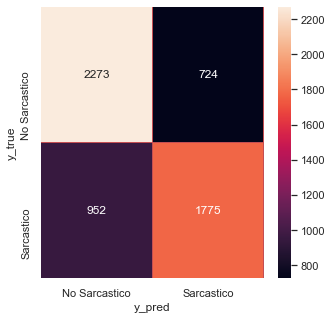

In [53]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

### Random Forest
a. Aplicamos random forest para predecir el sarcasmo de una nota en base a su titular.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42) # 50 árboles de decisión diferentes
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.6972396925227113


b. Matriz de confusión:

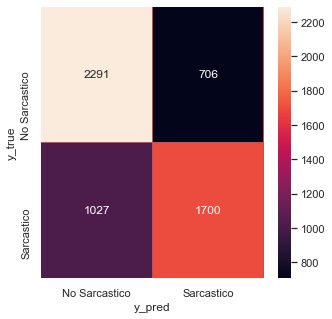

In [55]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

c. Vemos en este caso cuales son las palabras que mayormente determinan el sarcasmo de una nota para este clasificador.

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


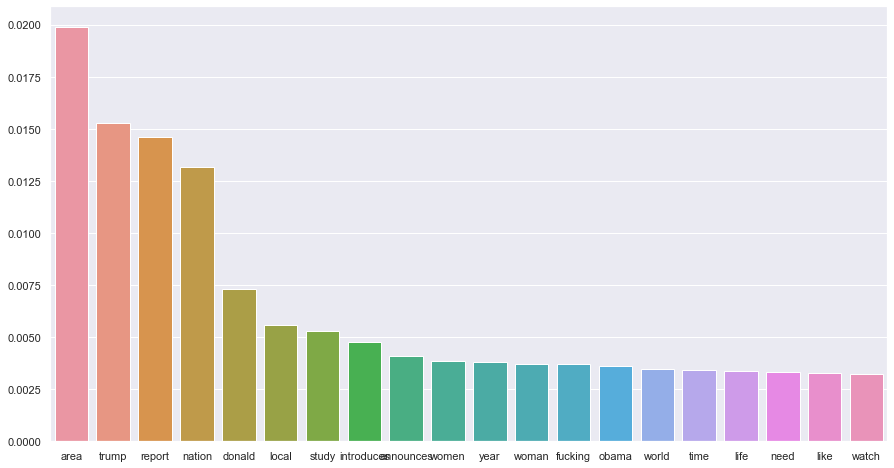

In [56]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

* La palabra más importante, para determinar si es un Sarcasmo, es `Área`.

### SVM
Por último se utilizará uno de los modelos mas prometedores para este tipo de datos donde el numero de features es comparable al número de instancias: SVM.

a. Se entrena un modelo de SVM Lineal y calcule su accuracy para C = 1.

In [57]:
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.7257162823200559

b. Matriz de confusión:

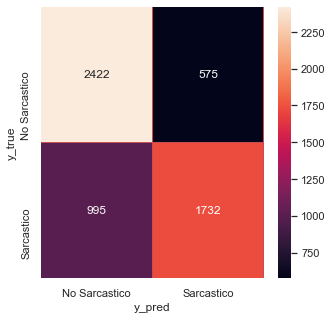

In [58]:
y_pred=svc.predict(xtest)
confusion(ytest,y_pred)

In [ ]:
SVM, fue el modelo que arrojó el mejor resultado, ya que fue el que menos se equivocó.  
Quizás probando con un modelo XGBoost, podríamos obtener un error aún menor.